In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the data
data = pd.read_csv('glassdoor_jobs.csv')
data

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom



### Data Cleaning


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [5]:
data.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [6]:
data.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [7]:
data = data.copy(deep= True)
#We can remove the Unnamed column as a dataframe already has index attached to it
data.drop(columns= ['Unnamed: 0'], inplace = True)
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [8]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

### Job Title Handling

In [9]:
data['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

The 'jobtitle_cleaner' function maps job titles to specific categories based on certain keywords in the job titles.

In [10]:

# job title cleaning

def jobtitle_cleaner(title):
    if 'data scientist' in title.lower():
        return 'D-sci'
    elif 'data engineer' in title.lower():
        return 'D-eng'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'ML'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'R&D'
    else:
        return 'na'

In [11]:
data['JobTitles'] = data['Job Title'].apply(jobtitle_cleaner)

In [12]:
data['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [13]:
data['JobTitles'].unique()

array(['D-sci', 'R&D', 'analyst', 'D-eng', 'na', 'director', 'ML',
       'manager'], dtype=object)

In [14]:

data['JobTitles'].value_counts()

D-sci       358
na          219
D-eng       158
analyst     124
manager      36
ML           26
R&D          19
director     16
Name: JobTitles, dtype: int64

The jobseniority function categorizes job titles into different seniority levels: 'Senior Prof' for senior-level roles, 'Junior Prof' for junior-level roles, and 'No Desc' for job titles that do not contain any keywords indicating seniority.

In [15]:
senior_list = ['sr','sr.','senior','principal', 'research', 'lead', 'R&D','II', 'III']
junior_list = ['jr','jr.','junior']


def jobseniority(title):
    for i in senior_list:
        if i in title.lower():
            return 'Senior Prof'
            
    for j in junior_list:
        if j in title.lower():
            return 'Junior Prof'
        else:
            return 'No Desc'

In [16]:

data['Job Seniority'] = data['Job Title'].apply(jobseniority)

In [17]:

data['Job Seniority'].unique()

array(['No Desc', 'Senior Prof', 'Junior Prof'], dtype=object)

In [18]:
data['Job Seniority'].value_counts()

No Desc        671
Senior Prof    283
Junior Prof      2
Name: Job Seniority, dtype: int64

### Job Description Handling

The below function processes job descriptions to create binary features for specific skills - (Python, Excel, R Studio, Spark, AWS). These binary features that are createed are then being used in models to predict/ analyze job  based on the presence or absence of these skills in job descriptions.






In [19]:
# job descriptions
jobs_list = ['python', 'excel','r studio', 'spark','aws']

for i in jobs_list:
    data[i+'_'+'job'] = data['Job Description'].apply(lambda x : 1 if i in x.lower() else 0)


In [20]:

for i in jobs_list:
    print(data[i+'_'+'job'].value_counts())

1    496
0    460
Name: python_job, dtype: int64
1    486
0    470
Name: excel_job, dtype: int64
0    955
1      1
Name: r studio_job, dtype: int64
0    742
1    214
Name: spark_job, dtype: int64
0    714
1    242
Name: aws_job, dtype: int64


### Company Name Handling

In [21]:
data['Company Name'].unique()

array(['Tecolote Research\n3.8',
       'University of Maryland Medical System\n3.4', 'KnowBe4\n4.8',
       'PNNL\n3.8', 'Affinity Solutions\n2.9', 'CyrusOne\n3.4',
       'ClearOne Advantage\n4.1', 'Logic20/20\n3.8',
       'Rochester Regional Health\n3.3', '<intent>\n4.6', 'Wish\n3.5',
       'ManTech\n4.1', 'Walmart\n3.2', 'Yesler\n4.1',
       'Takeda Pharmaceuticals\n3.7', 'Audible\n3.6',
       'Blueprint Medicines\n3.9', 'h2o.ai\n4.3', 'Nuna\n4.2',
       'Pinnacol Assurance\n4.0', 'Porch\n3.2', 'Health IQ\n3.9',
       'Truckstop.com\n3.8', 'SMC 3\n4.3', 'Mars\n3.9', 'Novetta\n4.0',
       'Pfizer\n4.0', 'First Tech Federal Credit Union\n3.5',
       'The Hanover Insurance Group\n3.7', 'Amrock\n3.6', 'Novartis\n3.8',
       'Juniper Networks\n3.8', 'New England Biolabs\n4.7',
       'Clarity Insights\n4.2', 'Esri\n3.5',
       'Systems & Technology Research\n4.7', 'Sartorius\n3.5',
       'Lancer Insurance\n3.5', 'Sauce Labs\n4.2', 'Amount\n4.1',
       'Persivia\n3.6', 'Edgew

Note that there are new line characters and rating after the company name. We are removing it.

In [22]:
data['Company Name'][0].split('\n')[0]

'Tecolote Research'

In [23]:
# remove numbers from company name
data['Company Name'] = data['Company Name'].apply(lambda x : x.split("\n")[0])
data['Company Name'].value_counts()

Novartis                          14
MassMutual                        14
Takeda Pharmaceuticals            14
Reynolds American                 14
Software Engineering Institute    13
                                  ..
Systems Evolution Inc.             1
Centro                             1
comScore                           1
Genesis Research                   1
Fivestars                          1
Name: Company Name, Length: 448, dtype: int64

### Head quarters Handling

In [24]:
data['Headquarters'].unique()

array(['Goleta, CA', 'Baltimore, MD', 'Clearwater, FL', 'Richland, WA',
       'New York, NY', 'Dallas, TX', 'Seattle, WA', 'Rochester, NY',
       'San Francisco, CA', 'Herndon, VA', 'Bentonville, AR',
       'OSAKA, Japan', 'Newark, NJ', 'Cambridge, MA', 'Mountain View, CA',
       'Denver, CO', 'New Plymouth, ID', 'Peachtree City, GA',
       'Mc Lean, VA', 'San Jose, CA', 'Worcester, MA', 'Detroit, MI',
       'Basel, Switzerland', 'Sunnyvale, CA', 'Ipswich, MA',
       'Chicago, IL', 'Redlands, CA', 'Woburn, MA', 'Gottingen, Germany',
       'Long Beach, NY', 'Lowell, MA', 'Shelton, CT', 'Alexandria, VA',
       'Foster City, CA', 'Omaha, NE', 'Chantilly, VA', 'Deerfield, IL',
       'London, United Kingdom', 'Fort Lauderdale, FL', 'Boston, MA',
       'Huntsville, AL', 'Zurich, Switzerland', 'Falls Church, VA',
       'Santa Clara, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'Holmdel, N

We can extract the most common state and the count

In [25]:
data['Hquarters'] = data['Headquarters'].str.split(',').str[1]
data['Hquarters'].value_counts().head()

 CA    223
 MA    101
 NY     86
 VA     72
 IL     42
Name: Hquarters, dtype: int64

### Location Handling

In [26]:
data['Location'].unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Oregon', 'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA',
       'Groton, CT', 'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA',
       'Redlands, CA', 'Woburn, MA', 'Fremont, CA', 'Long Beach, NY',
       'Marlborough, MA', 'Allendale, NJ', 'Chandler, AZ',
       'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Kingdom, IL',
       'Fort Lauderdale, FL', 'Boston, MA', 'Huntsville, AL',
       'Armonk, NY', 'San Diego, CA', 'Saint Louis, MO', 'Lincoln, RI',
       'Cincinnati, OH', 'Palo Alto, CA', 'Coraopolis, PA',
       'Framingham, MA', 'Atlanta, GA', 'New Jersey', 'Philadelphia, PA',
       

In [27]:

data['loaction spots'] = data['Location'].str.split(',').str[1]
data['loaction spots'].value_counts().head()

 CA    210
 MA    124
 NY     96
 VA     56
 IL     48
Name: loaction spots, dtype: int64

### Competitors Handling

In [28]:
data['Competitors'].unique()

array(['-1',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'Commerce Signals, Cardlytics, Yodlee',
       'Digital Realty, CoreSite, Equinix', 'Clicktripz, SmarterTravel',
       'Target, Costco Wholesale, Amazon', 'Novartis, Baxter, Pfizer',
       'bluebird bio, Agios Pharmaceuticals, Celgene',
       "Angie's List, HomeAdvisor, Thumbtack",
       'Leidos, CACI International, Booz Allen Hamilton',
       'Thermo Fisher Scientific, Enzymatics, Illumina', 'Pitney Bowes',
       'BrowserStack, Selenium Master, Perfecto Mobile',
       'Unilever, Procter & Gamble, Henkel',
       'UDR, AvalonBay Communities, Essex Property Trust',
       'American Express, Mastercard, Discover',
       'TASC, Vencore, Booz Allen Hamilton',
       'John Deere, Komatsu, CNH Industrial',
       'Travelers, Allstate, State Farm', 'Munich Re, Hannover RE, SCOR',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Slalom, Daugherty Busines

In [29]:
data['competitor company'] = data['Competitors'].str.split(',').str[0].replace('-1', 'no competitor')

In [30]:

data['competitor company'].value_counts()

no competitor                    634
Novartis                          14
Oak Ridge National Laboratory     12
Travelers                         11
Roche                              9
                                ... 
Greystar                           1
Ecolab                             1
USAA                               1
Clearlink                          1
Belly                              1
Name: competitor company, Length: 137, dtype: int64

The majoring of the values in competitor field says 'no competitor'. This concludes that the feature is less significant 

### Type of ownership Handling

In [31]:
data['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Contract', 'Unknown',
       'College / University', 'Private Practice / Firm', '-1',
       'School / School District'], dtype=object)

In [32]:

data['Ownership'] = data['Type of ownership'].str.split('-').str[1].replace(np.NaN, 'others')
data['Ownership'].value_counts()

 Private    532
 Public     237
others      176
1            11
Name: Ownership, dtype: int64

### Revenue Handling

In [33]:
data['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [34]:
data['Revenue'] = data['Revenue'].str.replace('-1','others')

In [35]:
data['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
others                               11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

### Size Handling

In [36]:
data['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [37]:
data['Size'] = data['Size'].str.replace('-1','others')
data['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
others                      11
Name: Size, dtype: int64

### Salary estimate Handling

In [38]:
data["Salary Estimate"].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

We can remove the $ symbol, and the text 'Glassdoor est.' and add 2 more columns called min salary and max salary

In [39]:

data['min_sal'] = data['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')

/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/3849272555.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['min_sal'] = data['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')


In [40]:
data['min_sal'] = data['min_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[0].str.replace('$','').str.replace('K','')

/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/2511411001.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['min_sal'] = data['min_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[0].str.replace('$','').str.replace('K','')
/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/2511411001.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['min_sal'] = data['min_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[0].str.replace('$','').str.replace('K','')


In [41]:
data['min_sal'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '',
       '109', '75', '34', '72', '93', '85', '77', '82', '115', '74', '68',
       '52', 'Employer Provided Salary:150', '158', '20', '41', '111',
       '84', '107', '49', '61', '88', '60', '96', '65', '139', '50', '99',
       '79', '57', '94', '37', '100', '55', '39', '31', '117', '40', '89',
       '200', '121', '76', '91', '95', '43', '29', '26', '112', '51',
       '113', 'Employer Provided Salary:120', '59', '44', '124', '131',
       '132', '17', '42', '116', '48', '105', '98',
       'Employer Provided Salary:200', '21', '114', '108', '90', '138',
       '190', '35', '18', '69', '66', '15', '33', '62', '127', '78', '45',
       '70', '130', '92', 'Employer Provided Salary:85', '36', '97', '24',
       '202', '32', '87', 'Employer Provided Salary:25',
       'Employer Provided Salary:100', '101', '125',
       'Employer Provided Salary:1

In [42]:
data['min_sal'] = data['min_sal'].str.replace('Employer Provided Salary:','')
data['min_sal'].unique()

array(['53', '63', '80', '56', '86', '71', '54', '38', '120', '126', '64',
       '106', '46', '83', '102', '67', '118', '110', '81', '73', '',
       '109', '75', '34', '72', '93', '85', '77', '82', '115', '74', '68',
       '52', '150', '158', '20', '41', '111', '84', '107', '49', '61',
       '88', '60', '96', '65', '139', '50', '99', '79', '57', '94', '37',
       '100', '55', '39', '31', '117', '40', '89', '200', '121', '76',
       '91', '95', '43', '29', '26', '112', '51', '113', '59', '44',
       '124', '131', '132', '17', '42', '116', '48', '105', '98', '21',
       '114', '108', '90', '138', '190', '35', '18', '69', '66', '15',
       '33', '62', '127', '78', '45', '70', '130', '92', '36', '97', '24',
       '202', '32', '87', '25', '101', '125', '10', '47', '176', '135',
       '129', '119', '27', '58', '136', '171'], dtype=object)

In [43]:
data['max_sal'] = data['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')
data['max_sal']

/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/2379417924.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['max_sal'] = data['Salary Estimate'].str.split(",").str[0].str.replace('(Glassdoor est.)','')


0       $53K-$91K ()
1      $63K-$112K ()
2       $80K-$90K ()
3       $56K-$97K ()
4      $86K-$143K ()
           ...      
951    $72K-$133K ()
952     $56K-$91K ()
953    $95K-$160K ()
954               -1
955    $61K-$126K ()
Name: max_sal, Length: 956, dtype: object

In [44]:
data['max_sal'] = data['max_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[1].str.replace('$','').str.replace('K','')

/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/3503997895.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['max_sal'] = data['max_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[1].str.replace('$','').str.replace('K','')
/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/3503997895.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['max_sal'] = data['max_sal'].str.replace('(Glassdoor est.)','').str.split('-').str[1].str.replace('$','').str.replace('K','')


In [45]:

data['max_sal'] = data['max_sal'].str.replace('(Employer est.)','')

/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/294843600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['max_sal'] = data['max_sal'].str.replace('(Employer est.)','')


In [46]:
data['max_sal'] = data['max_sal'].str.split().str[0].str.replace('(','').str.replace(')','')

/var/folders/4f/754nqwf50xs0h2gz6ck4c6f40000gn/T/ipykernel_5846/2557195457.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['max_sal'] = data['max_sal'].str.split().str[0].str.replace('(','').str.replace(')','')


In [47]:
data['max_sal'].unique()

array(['91', '112', '90', '97', '143', '119', '93', '142', '84', '160',
       '201', '106', '172', '85', '144', '190', '137', '189', '175',
       '111', '130', '139', '105', '1', '177', '110', '124', '61', '120',
       '149', '140', '135', '132', '180', '138', '129', '113', '150',
       '211', '39', '117', '99', '114', '95', '176', '146', '109', '148',
       '72', '161', '81', '220', '102', '122', '157', '222', '118', '141',
       '154', '76', '100', '68', '107', '65', '62', '231', '134', '116',
       '123', '73', '164', '153', '275', '71', '193', '163', '101', '133',
       '125', '173', '159', '50', '55', '182', '223', '145', '115', '136',
       '167', '204', '78', '207', '174', '80', '24', '82', '185', '198',
       '250', '34', '206', '183', '166', '179', '127', '224', '25', '66',
       '86', '92', '103', '64', '16', '199', '126', '63', '194', '74',
       '208', '162', '209', '89', '202', '57', '200', '196', '171', '306',
       '59', '158', '28', '155', '98', '96', '210'

In [48]:
data['min_sal'] = pd.to_numeric(data['min_sal'], errors='coerce')
type(data['min_sal'])

pandas.core.series.Series

In [49]:
data['min_sal'].isna().sum()

214

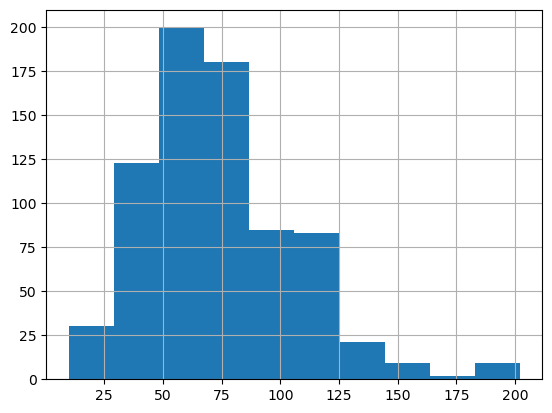

In [50]:
data['min_sal'].hist()
plt.show()

In [51]:
data['max_sal'].isna().sum()

0

In [52]:

data['min_sal'] = data['min_sal'].replace(np.nan, data['min_sal'].mean())

In [53]:

data['max_sal'] = pd.to_numeric(data['max_sal'], errors='coerce')

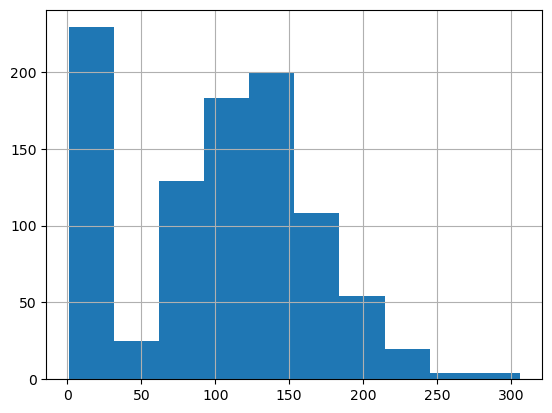

In [54]:

data['max_sal'].hist()
plt.show()

We can create a new column called 'Average Salary' which will be used to predict Salary later in the code using Machine Learning models

In [55]:

data['avg.salary'] = (data['min_sal'] + data['max_sal'])/ 2

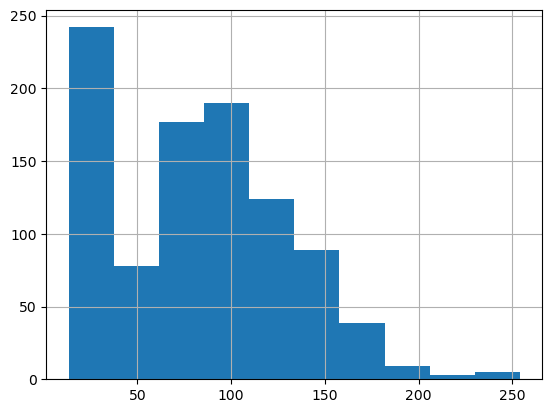

In [56]:
data['avg.salary'].hist()
plt.show()

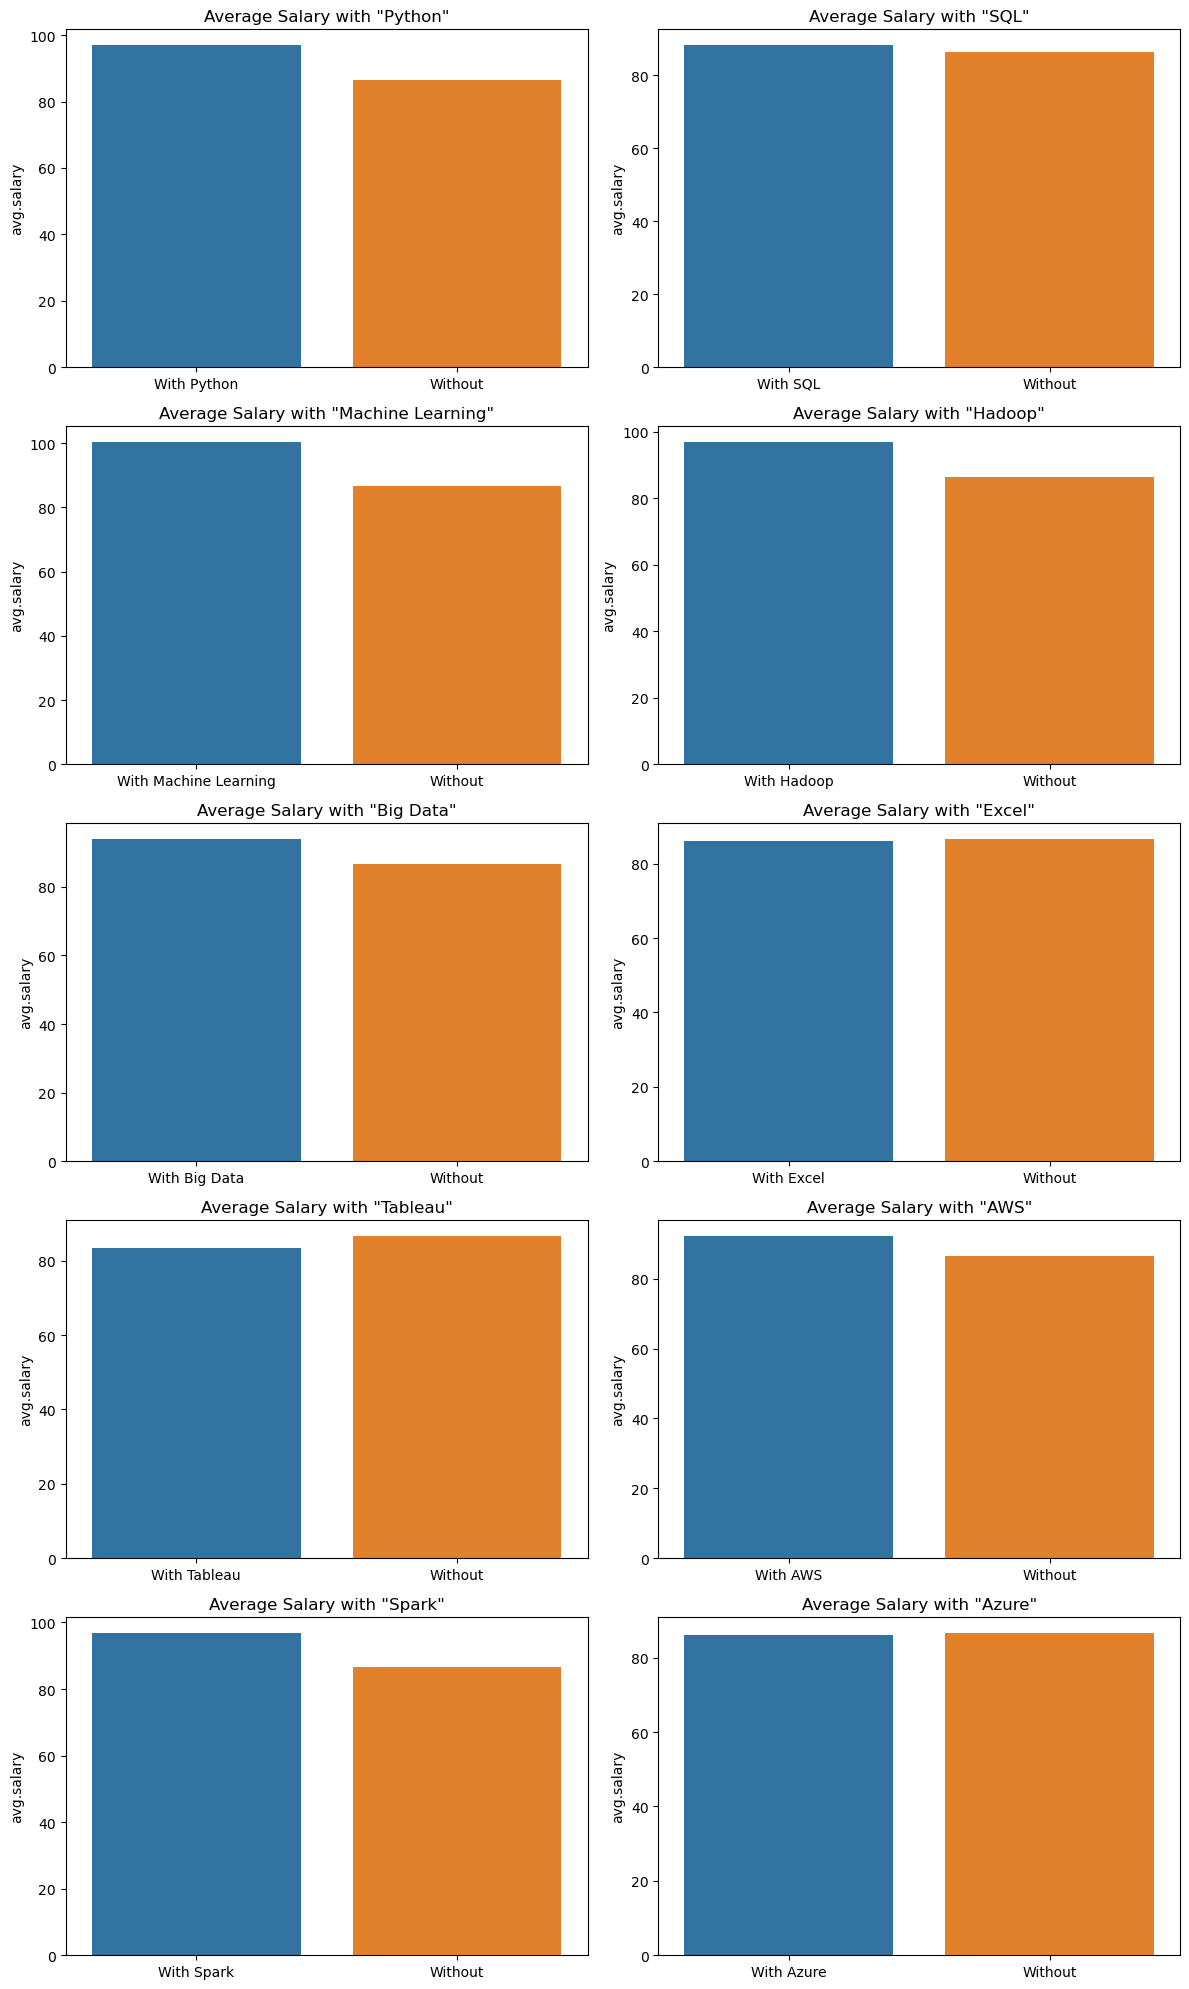

In [57]:
key_check=['Python','SQL', 'Machine Learning', 'Hadoop', 'Big Data', 'Excel', 'Tableau', 'AWS', 'Spark','Azure']


num_rows = (len(key_check) + 1) // 2  # Round up for odd number of keywords
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

for idx, keyword in enumerate(key_check):
    row = idx // num_cols
    col = idx % num_cols
    
    keyword_mask = data['Job Description'].str.contains(keyword, case=False)
    keyword_df = data[keyword_mask]
    average_salary_with_keyword = keyword_df['avg.salary'].mean()
    
    sns.barplot(x=[f'With {keyword}', 'Without'],
                y=[average_salary_with_keyword, data['avg.salary'].mean()],
                ax=axs[row, col])
    axs[row, col].set_title(f'Average Salary with "{keyword}"')
    axs[row, col].set_ylabel('avg.salary')

plt.tight_layout()
plt.show()

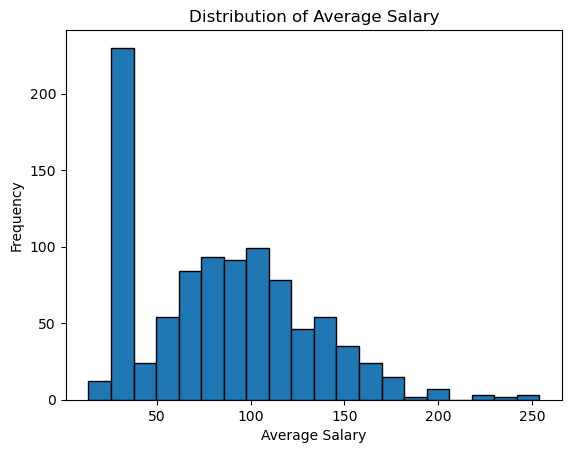

In [58]:
plt.hist(data['avg.salary'], bins=20, edgecolor='black')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Average Salary')
plt.show()

In [59]:
# Job State
data['State']=data.Location.str.split(',').str[1]
data['City']=data.Location.str.split(',').str[0]
data.State=data.State.str.lstrip()
data.City=data.City.str.lstrip()
data['City']
data['State']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
951    TN
952    PA
953    PA
954    TX
955    OH
Name: State, Length: 956, dtype: object

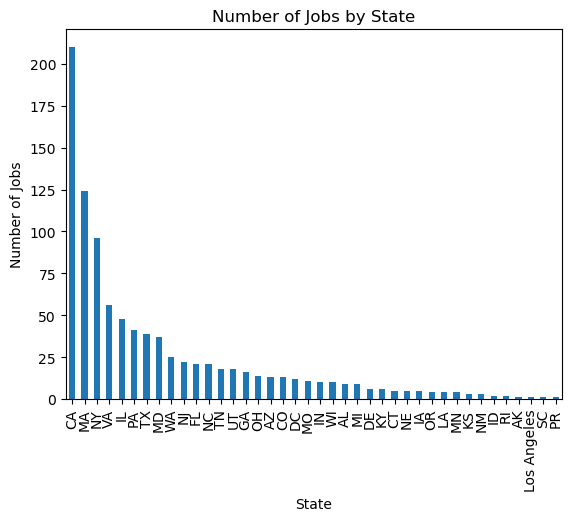

In [60]:
state_counts = data['State'].value_counts()
state_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs by State')
plt.show()

In [61]:
# Rating
bins = [0, 1, 2, 3, 4, 5, np.inf]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', 'NaN']
data['Rating Interval'] = pd.cut(data['Rating'], bins=bins, labels=labels, include_lowest=True)

In [62]:
data['Rating Interval']

0      3-4
1      3-4
2      4-5
3      3-4
4      2-3
      ... 
951    4-5
952    2-3
953    3-4
954    4-5
955    3-4
Name: Rating Interval, Length: 956, dtype: category
Categories (6, object): ['0-1' < '1-2' < '2-3' < '3-4' < '4-5' < 'NaN']

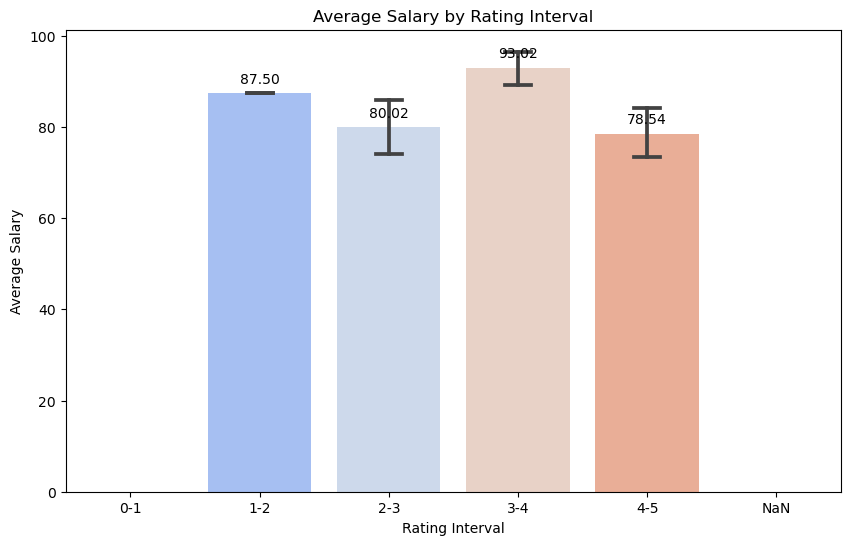

In [63]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating Interval', y='avg.salary', data=data, capsize=0.2, palette='coolwarm')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average Salary by Rating Interval')
plt.xlabel('Rating Interval')
plt.ylabel('Average Salary')
plt.show()

### Data gathering

Graph for Size: total = 9


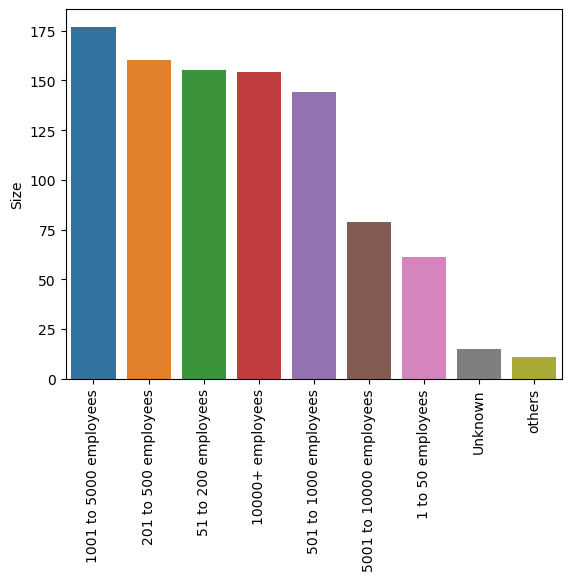

Graph for Type of ownership: total = 13


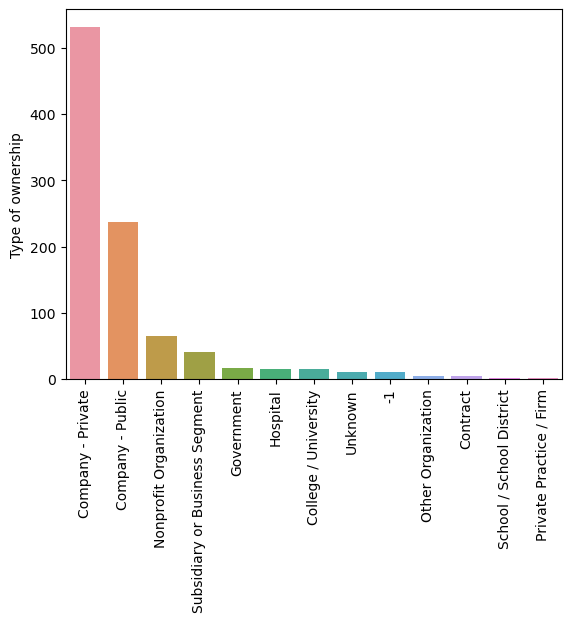

Graph for Industry: total = 63


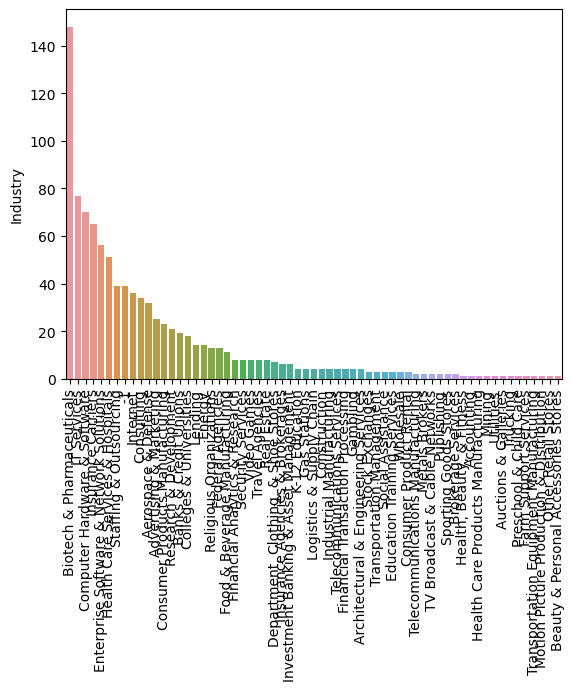

Graph for Sector: total = 25


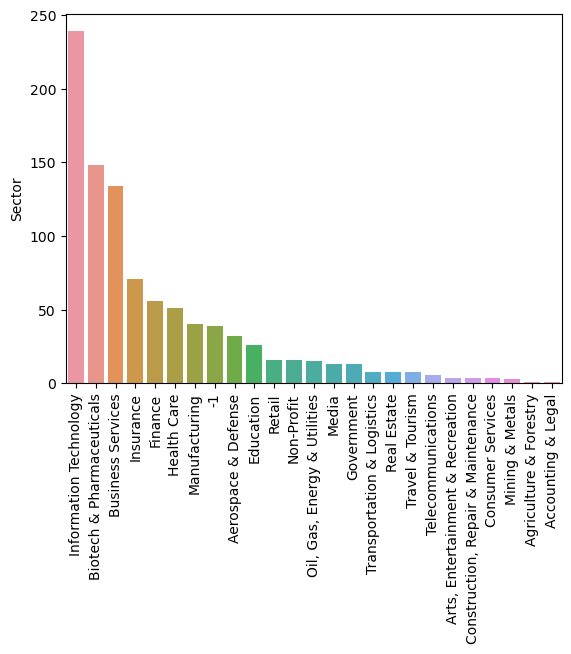

Graph for Revenue: total = 14


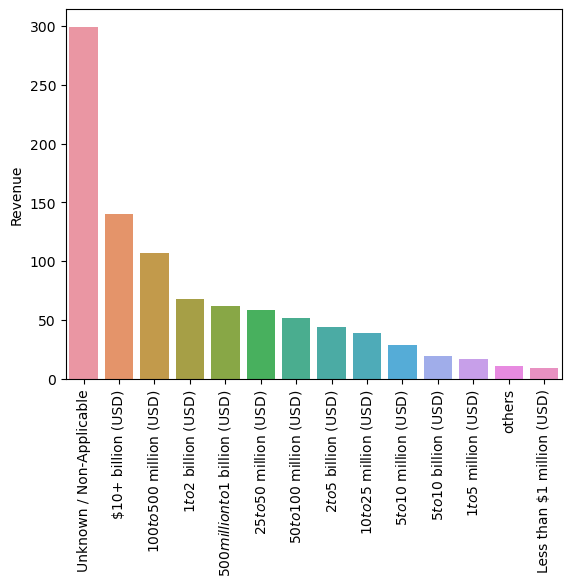

Graph for python_job: total = 2


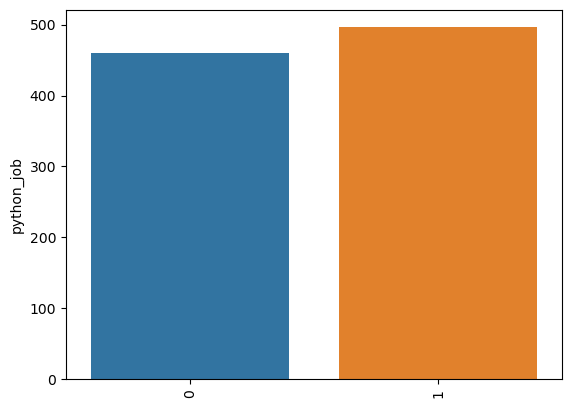

Graph for r studio_job: total = 2


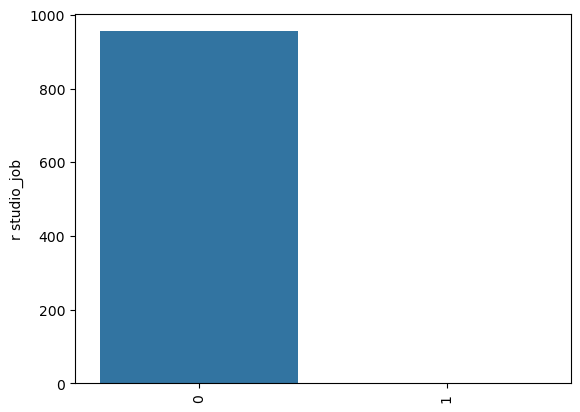

Graph for spark_job: total = 2


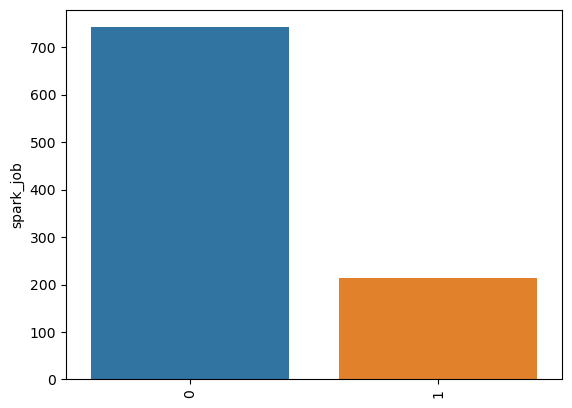

Graph for aws_job: total = 2


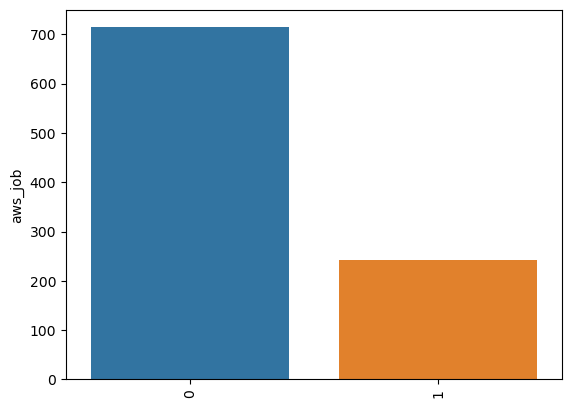

Graph for excel_job: total = 2


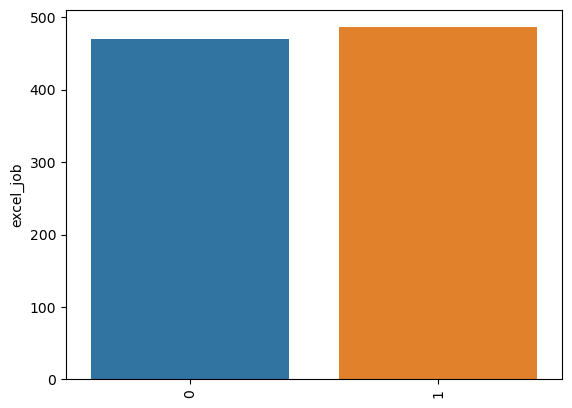

Graph for Job Seniority: total = 3


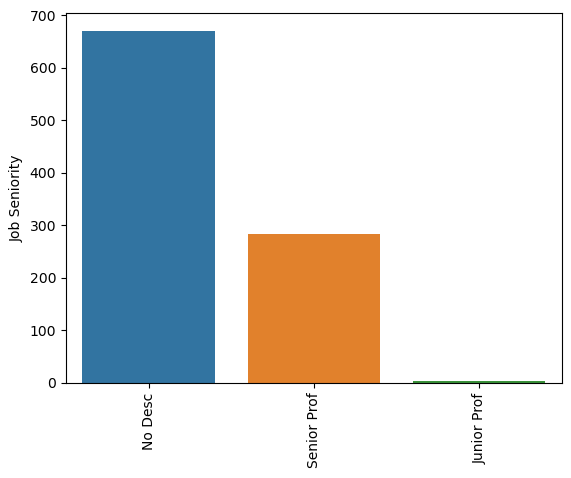

Graph for Hquarters: total = 50


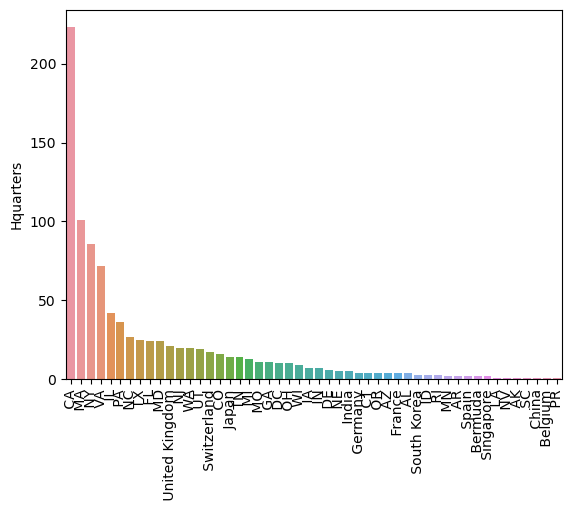

In [64]:
# This is finding the co-relation of all the features having categorical values 
df_cat = data[['Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue','python_job', 'r studio_job',
 'spark_job', 'aws_job', 'excel_job', 'Job Seniority', 'Hquarters']]
for i in df_cat.columns:
    cat_num  = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels() ,rotation=90)
    plt.show()

In [65]:

data.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'JobTitles', 'Job Seniority', 'python_job', 'excel_job', 'r studio_job',
       'spark_job', 'aws_job', 'Hquarters', 'loaction spots',
       'competitor company', 'Ownership', 'min_sal', 'max_sal', 'avg.salary',
       'State', 'City', 'Rating Interval'],
      dtype='object')

In [66]:
final_data = data[['Rating',
       'Company Name', 'Size',
       'Type of ownership','Sector', 'Revenue',
       'JobTitles', 'Job Seniority', 'python_job', 'excel_job', 'r studio_job',
       'spark_job', 'aws_job', 'Hquarters', 'loaction spots',
       'competitor company', 'Ownership','avg.salary']]
final_data.head()

,Rating,Company Name,Size,Type of ownership,Sector,Revenue,JobTitles,Job Seniority,python_job,excel_job,r studio_job,spark_job,aws_job,Hquarters,loaction spots,competitor company,Ownership,avg.salary
0,3.8,Tecolote Research,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),D-sci,No Desc,1,1,0,0,0,CA,NM,no competitor,Private,72.0
1,3.4,University of Maryland Medical System,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),D-sci,No Desc,1,0,0,0,0,MD,MD,no competitor,others,87.5
2,4.8,KnowBe4,501 to 1000 employees,Company - Private,Business Services,$100 to $500 million (USD),D-sci,No Desc,1,1,0,1,0,FL,FL,no competitor,Private,85.0
3,3.8,PNNL,1001 to 5000 employees,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),D-sci,No Desc,1,0,0,0,0,WA,WA,Oak Ridge National Laboratory,others,76.5
4,2.9,Affinity Solutions,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,D-sci,No Desc,1,1,0,0,0,NY,NY,Commerce Signals,Private,114.5


### Converting Categorical variable to Numerical variable using get_dummies function

In [67]:
final_data = pd.get_dummies(data = final_data, columns = ['Company Name', 'Size', 'Type of ownership', 'Sector',
       'Revenue', 'JobTitles', 'Job Seniority','Hquarters', 'loaction spots',
       'competitor company', 'Ownership'])

In [68]:

final_data.head()

,Rating,python_job,excel_job,r studio_job,spark_job,aws_job,avg.salary,"Company Name_1-800-FLOWERS.COM, Inc.",Company Name_1904labs,Company Name_23andMe,...,competitor company_World Wide Technology,competitor company_YOOX NET-A-PORTER GROUP,competitor company_Zocdoc,competitor company_bluebird bio,competitor company_eClinicalWorks,competitor company_no competitor,Ownership_ Private,Ownership_ Public,Ownership_1,Ownership_others
0,3.8,1,1,0,0,0,72.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,3.4,1,0,0,0,0,87.5,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,4.8,1,1,0,1,0,85.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3.8,1,0,0,0,0,76.5,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.9,1,1,0,0,0,114.5,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Data Scaling using MinMaxScaler

In [69]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
final_data[['Rating', 'avg.salary']] = ms.fit_transform(final_data[['Rating', 'avg.salary']])

In [70]:
final_data.head()

,Rating,python_job,excel_job,r studio_job,spark_job,aws_job,avg.salary,"Company Name_1-800-FLOWERS.COM, Inc.",Company Name_1904labs,Company Name_23andMe,...,competitor company_World Wide Technology,competitor company_YOOX NET-A-PORTER GROUP,competitor company_Zocdoc,competitor company_bluebird bio,competitor company_eClinicalWorks,competitor company_no competitor,Ownership_ Private,Ownership_ Public,Ownership_1,Ownership_others
0,0.800000,1,1,0,0,0,0.243243,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.733333,1,0,0,0,0,0.307692,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0.966667,1,1,0,1,0,0.297297,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.800000,1,0,0,0,0,0.261954,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.650000,1,1,0,0,0,0.419958,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
# split the data into attributes and lable
X = final_data.drop(columns= 'avg.salary').values
y = final_data.iloc[:, 6].values

### train and test

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
# Apply StandardScaler to the remaining columns in X_train and X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model selection and Hyperparameter tuning using GridSearch

In [74]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import pandas as pd

def find_best_model(X, y):
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True, False]
            }
        },
        
        'Lasso Regression': {
            'model': Lasso(),
            'parameters': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        
        'Ridge Regression': {
            'model': Ridge(),
            'parameters': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=0),
            'parameters': {
                'max_depth': [5, 10]
            }
        },
        
        'Random Forest': {
            'model': RandomForestRegressor(random_state=0),
            'parameters': {
                'n_estimators': [10, 15, 20, 50, 100, 200]
            }
        },
        
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(random_state=0),
            'parameters': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.5]
            }
        },
        
        'Support Vector Machine': {
            'model': SVR(),
            'parameters': {
                'C': [1, 10, 20],
                'kernel': ['rbf', 'linear']
            }
        }
    }
    
    results = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        results.append({
            'Model': model_name,
            'Best Parameters': gs.best_params_,
            'Test Score': gs.best_score_
        })
        
    return pd.DataFrame(results)

# Call the function with your X_train, y_train data
best_models_results = find_best_model(X_train, y_train)

# Print the results
print(best_models_results)


/Users/sivaranjanis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/sivaranjanis/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.

                    Model                              Best Parameters  \
0       Linear Regression                         {'normalize': False}   
1        Lasso Regression                               {'alpha': 0.1}   
2        Ridge Regression                               {'alpha': 1.0}   
3           Decision Tree                            {'max_depth': 10}   
4           Random Forest                        {'n_estimators': 200}   
5       Gradient Boosting  {'learning_rate': 0.5, 'n_estimators': 150}   
6  Support Vector Machine                   {'C': 20, 'kernel': 'rbf'}   

     Test Score  
0 -2.541923e+25  
1 -2.211658e-03  
2  4.914835e-01  
3  3.902574e-01  
4  5.681173e-01  
5  5.750382e-01  
6  5.014507e-01  


In [75]:
from sklearn.metrics import mean_squared_error


In [76]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_train_accuracy = lr_model.score(X_train, y_train)
lr_test_accuracy = lr_model.score(X_test, y_test)
print("Linear Regression: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(lr_train_accuracy * 100, lr_test_accuracy * 100))
# Make predictions using the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

# Calculate Mean Squared Error for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)

Linear Regression: Training Accuracy - 91.94%, Test Accuracy - -1594303035780299630191837184.00%
Mean Squared Error (Linear Regression): 4.879806413154905e+23


In [77]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)
lasso_train_accuracy = lasso_model.score(X_train, y_train)
lasso_test_accuracy = lasso_model.score(X_test, y_test)
print("Lasso Regression: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(lasso_train_accuracy * 100, lasso_test_accuracy * 100))


Lasso Regression: Training Accuracy - 0.00%, Test Accuracy - -0.03%


In [78]:
from sklearn.metrics import mean_squared_error

# Example for Mean Squared Error
y_pred = lasso_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.030617699058597472


Linear Regression, lasso regression gave very bad training and testing accuracy. Hence, we can use other regression models

In [79]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_train_accuracy = ridge_model.score(X_train, y_train)
ridge_test_accuracy = ridge_model.score(X_test, y_test)
print("Ridge Regression: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(ridge_train_accuracy * 100, ridge_test_accuracy * 100))

Ridge Regression: Training Accuracy - 85.31%, Test Accuracy - 58.96%


In [80]:
y_pred_ridge = ridge_model.predict(X_test)

# Calculate Mean Squared Error for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)


Mean Squared Error (Ridge Regression): 0.012560982830011122


In [81]:
# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=0)  # You can adjust the max_depth parameter
dt_model.fit(X_train, y_train)
dt_train_accuracy = dt_model.score(X_train, y_train)
dt_test_accuracy = dt_model.score(X_test, y_test)
print("Decision Tree: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(dt_train_accuracy * 100, dt_test_accuracy * 100))


Decision Tree: Training Accuracy - 47.69%, Test Accuracy - 16.91%


In [82]:
# Make predictions using the Decision Tree model
y_pred_dt = dt_model.predict(X_test)

# Calculate Mean Squared Error for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)

Mean Squared Error (Decision Tree): 0.025431389292545525


In [83]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the n_estimators parameter
rf_model.fit(X_train, y_train)
rf_train_accuracy = rf_model.score(X_train, y_train)
rf_test_accuracy = rf_model.score(X_test, y_test)
print("Random Forest: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(rf_train_accuracy * 100, rf_test_accuracy * 100))


Random Forest: Training Accuracy - 94.28%, Test Accuracy - 61.38%


In [84]:
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 0.011821835588359517


In [85]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)  # You can adjust the parameters
gb_model.fit(X_train, y_train)
gb_train_accuracy = gb_model.score(X_train, y_train)
gb_test_accuracy = gb_model.score(X_test, y_test)
print("Gradient Boosting: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(gb_train_accuracy * 100, gb_test_accuracy * 100))


Gradient Boosting: Training Accuracy - 65.21%, Test Accuracy - 45.55%


In [86]:
# Make predictions using the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Calculate Mean Squared Error for Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)

Mean Squared Error (Gradient Boosting): 0.01666507823693792


In [87]:
# Support Vector Machine
svm_model = SVR(C=1.0, kernel='rbf')  # You can adjust the C and kernel parameters
svm_model.fit(X_train, y_train)
svm_train_accuracy = svm_model.score(X_train, y_train)
svm_test_accuracy = svm_model.score(X_test, y_test)
print("Support Vector Machine: Training Accuracy - {:.2f}%, Test Accuracy - {:.2f}%".format(svm_train_accuracy * 100, svm_test_accuracy * 100))

Support Vector Machine: Training Accuracy - 77.26%, Test Accuracy - 58.78%


In [88]:
y_pred_svm = svm_model.predict(X_test)

# Calculate Mean Squared Error for Support Vector Machine
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("Mean Squared Error (Support Vector Machine):", mse_svm)

Mean Squared Error (Support Vector Machine): 0.012617509089067494


In [89]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions using the models
linear_regression_predictions = lr_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
decision_tree_predictions = dt_model.predict(X_test)
random_forest_predictions = rf_model.predict(X_test)
gradient_boosting_predictions = gb_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluating the models
def evaluate_model(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    print("-" * 30)

# Evaluate each model
evaluate_model(linear_regression_predictions, "Linear Regression")
evaluate_model(lasso_predictions, "Lasso Regression")
evaluate_model(ridge_predictions, "Ridge Regression")
evaluate_model(decision_tree_predictions, "Decision Tree")
evaluate_model(random_forest_predictions, "Random Forest")
evaluate_model(gradient_boosting_predictions, "Gradient Boosting")
evaluate_model(svm_predictions, "Support Vector Machine")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 487980641315490476589056.00
R-squared (R2): -15943030357802996130119680.00
------------------------------
Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 0.03
R-squared (R2): -0.00
------------------------------
Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 0.01
R-squared (R2): 0.59
------------------------------
Decision Tree Model Evaluation:
Mean Squared Error (MSE): 0.03
R-squared (R2): 0.17
------------------------------
Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.01
R-squared (R2): 0.61
------------------------------
Gradient Boosting Model Evaluation:
Mean Squared Error (MSE): 0.02
R-squared (R2): 0.46
------------------------------
Support Vector Machine Model Evaluation:
Mean Squared Error (MSE): 0.01
R-squared (R2): 0.59
------------------------------


Lets try one more regression model 

In [90]:
# Creating AdaBoost regression model
from sklearn.ensemble import AdaBoostRegressor
adb_model = AdaBoostRegressor(base_estimator=dt_model, n_estimators=250, learning_rate=1, random_state=0)
# Fitting the dataset to the model
adb_model.fit(X_train, y_train)
print("Accuracy of the AdaBoost Regression Model on Training set is : {}% and on Test set is {}%".format(round(adb_model.score(X_train, y_train),4)*100, round(adb_model.score(X_test, y_test),4)*100))

Accuracy of the AdaBoost Regression Model on Training set is : 45.989999999999995% and on Test set is 30.75%


In [91]:
adb_predictions = adb_model.predict(X_test)

# Calculate Mean Squared Error for AdaBoost Regression
mse_adb = mean_squared_error(y_test, adb_predictions)
print("Mean Squared Error (AdaBoost Regression):", mse_adb)
r2_adb = r2_score(y_test, adb_predictions)
print("R-squared (AdaBoost Regression): {:.2f}".format(r2_adb))

Mean Squared Error (AdaBoost Regression): 0.021194623645848842
R-squared (AdaBoost Regression): 0.31


### Conclusion

The Random Forest model performed the best with the lowest MSE and the highest R-squared value, indicating it explains 61% of the variance in the data.

1. Random Forest Model:
    MSE: 0.01
    R-squared: 0.61
2. Ridge Regression Model:
    MSE: 0.01
    R-squared: 0.59
3. Support Vector Machine Model:
    MSE: 0.01
    R-squared: 0.59
4. AdaBoost Regression Model:
    MSE: 0.0143
    R-squared: 0.53
5. Gradient Boosting Model:
    MSE: 0.02
    R-squared: 0.46
6. Decision Tree Model:
    MSE: 0.03
    R-squared: 0.17
7. Lasso Regression Model:
    MSE: 0.03
    R-squared: -0.00
8. Linear Regression Model:
    MSE: Extremely high
    R-squared: Extremely low (negative)